In [10]:
!pip install yfinance matplotlib pandas

  Using cached websockets-15.0.1-cp313-cp313-win_amd64.whl.metadata (7.0 kB)
Using cached websockets-15.0.1-cp313-cp313-win_amd64.whl (176 kB)
  Attempting uninstall: websockets
    Found existing installation: websockets 10.4
    Uninstalling websockets-10.4:
      Successfully uninstalled websockets-10.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires websockets<11.0,>=10.0, but you have websockets 15.0.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# step 1: Defining my portfolio
portfolio = {
    'AMD': {'shares': 153.56, 'buy_price': 103.27} ,
    'AMZN': {'shares': 58.19, 'buy_price': 197.94} ,
    'HOOD': {'shares': 83.19, 'buy_price': 84.02} ,
    'NKE': {'shares': 13.67, 'buy_price': 76.52} ,
    'CELH': {'shares': 20.05, 'buy_price': 25.95} ,
}


In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# step 2: Get current stock data
tickers = list(portfolio.keys())
data_all = yf.download(tickers, start="2025-03-01", auto_adjust=True)
data = data_all['Close']
data = data.ffill() 
data.tail()


[*********************100%***********************]  5 of 5 completed


Ticker,AMD,AMZN,CELH,HOOD,NKE
Date,,,,,
2025-07-21,157.000000,229.300003,43.610001,104.339996,74.019997
2025-07-22,154.720001,227.470001,44.340000,101.849998,75.389999
2025-07-23,158.649994,228.289993,45.160000,102.080002,76.750000
2025-07-24,162.119995,232.229996,46.310001,101.930000,75.419998
2025-07-25,166.470001,231.440002,46.639999,104.849998,76.269997


In [13]:
# step 3: Multiply each stock price by number os shares
portfolio_value = pd.DataFrame()
for ticker in portfolio:
    shares = portfolio[ticker]['shares']
    portfolio_value[ticker] = data[ticker] * shares

# step 4: Total portfolio Value
portfolio_value['Total'] = portfolio_value.sum(axis=1)

portfolio_value.tail()

    

,AMD,AMZN,HOOD,NKE,CELH,Total
Date,,,,,,
2025-07-21,24108.920000,13342.967178,8680.044295,1011.853354,874.380512,48018.165339
2025-07-22,23758.803387,13236.479371,8472.901373,1030.581292,889.017003,47387.782426
2025-07-23,24362.293063,13284.194709,8492.035352,1049.172500,905.457997,48093.153621
2025-07-24,24895.146450,13513.463451,8479.556725,1030.991375,928.515528,48847.673529
2025-07-25,25563.133387,13467.493742,8722.471373,1042.610854,935.131988,49730.841344


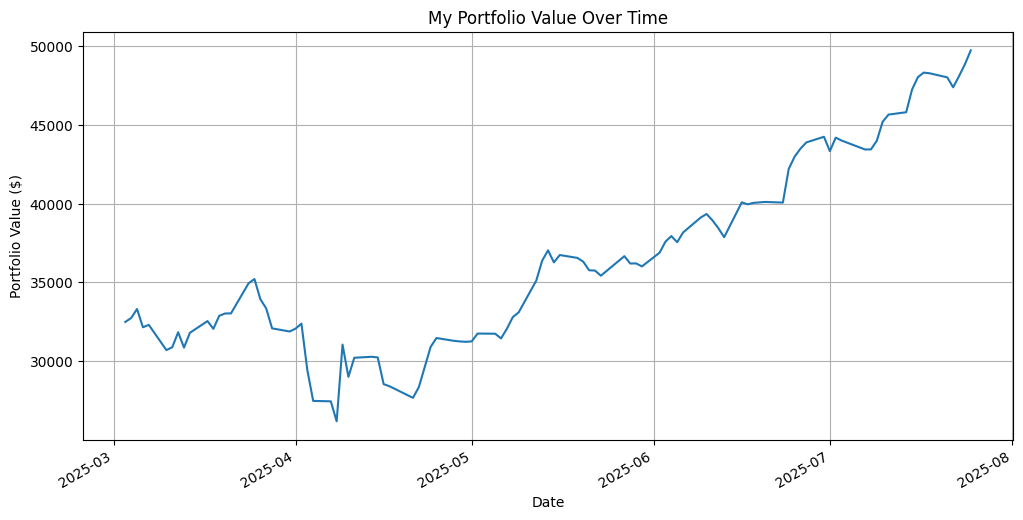

In [14]:
# step 5: plot total portfolio value over time
portfolio_value['Total'].plot(figsize=(12, 6), title='My Portfolio Value Over Time', grid=True)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.show()


In [15]:
# step 6: Download S&P 500 as a Benchmark
sp500 = yf.download('^GSPC', start="2025-03-01", auto_adjust=True)['Close']
sp500 = sp500.ffill()

[*********************100%***********************]  1 of 1 completed


In [16]:
# step 7: Normalize both to start at 100
normalized_portfolio = portfolio_value['Total'] / portfolio_value['Total'].iloc[0] * 100
normalized_sp500 = sp500 / sp500.iloc[0] * 100

#Align both series to the same index
aligned_sp500 = normalized_sp500.reindex(normalized_portfolio.index)

# combine both
comparison = pd.DataFrame({
    'My Portfolio': normalized_portfolio.squeeze(),
    'S&P 500': aligned_sp500.squeeze()
})
comparison.tail()

,My Portfolio,S&P 500
Date,,
2025-07-21,147.774739,107.793191
2025-07-22,145.834751,107.861913
2025-07-23,148.005514,108.704518
2025-07-24,150.327531,108.780418
2025-07-25,153.045458,109.212747


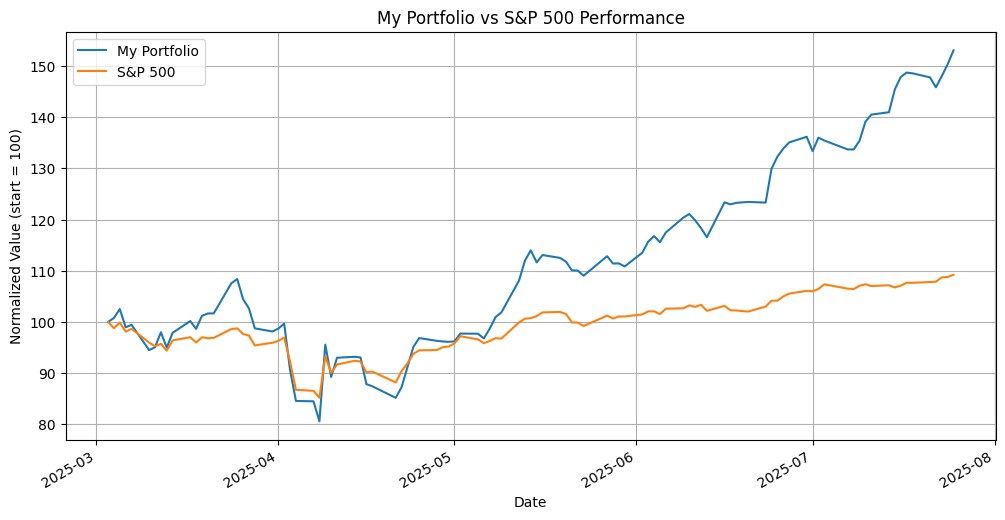

In [17]:
#step 8: Plot Comparison
comparison.plot(figsize=(12, 6), title='My Portfolio vs S&P 500 Performance', grid=True)
plt.ylabel('Normalized Value (start = 100)')
plt.xlabel('Date')
plt.show()


In [18]:
final_returns = comparison.iloc[-1] / comparison.iloc[0] -1
print(final_returns)


My Portfolio    0.530455
S&P 500         0.092127
dtype: float64


In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


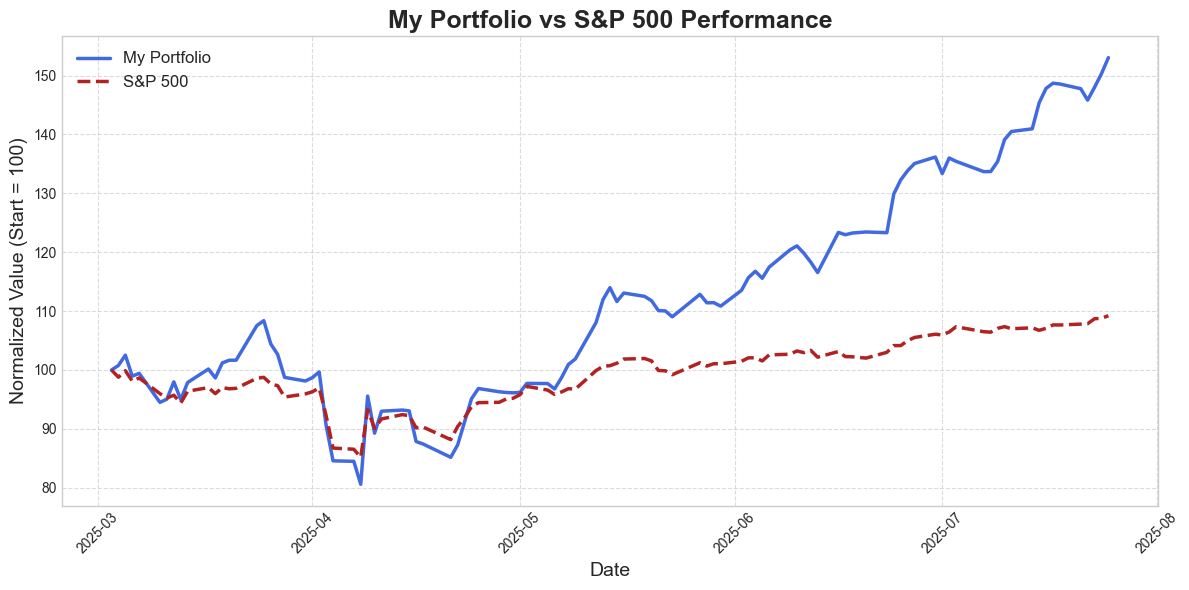

In [20]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')  # Clean look

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting both lines with styling
ax.plot(comparison.index, comparison["My Portfolio"], label="My Portfolio", color='royalblue', linewidth=2.5)
ax.plot(comparison.index, comparison["S&P 500"], label="S&P 500", color='firebrick', linewidth=2.5, linestyle='--')

# Titles and labels
ax.set_title("My Portfolio vs S&P 500 Performance", fontsize=18, fontweight='bold')
ax.set_ylabel("Normalized Value (Start = 100)", fontsize=14)
ax.set_xlabel("Date", fontsize=14)

# Grid, legend and layout
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



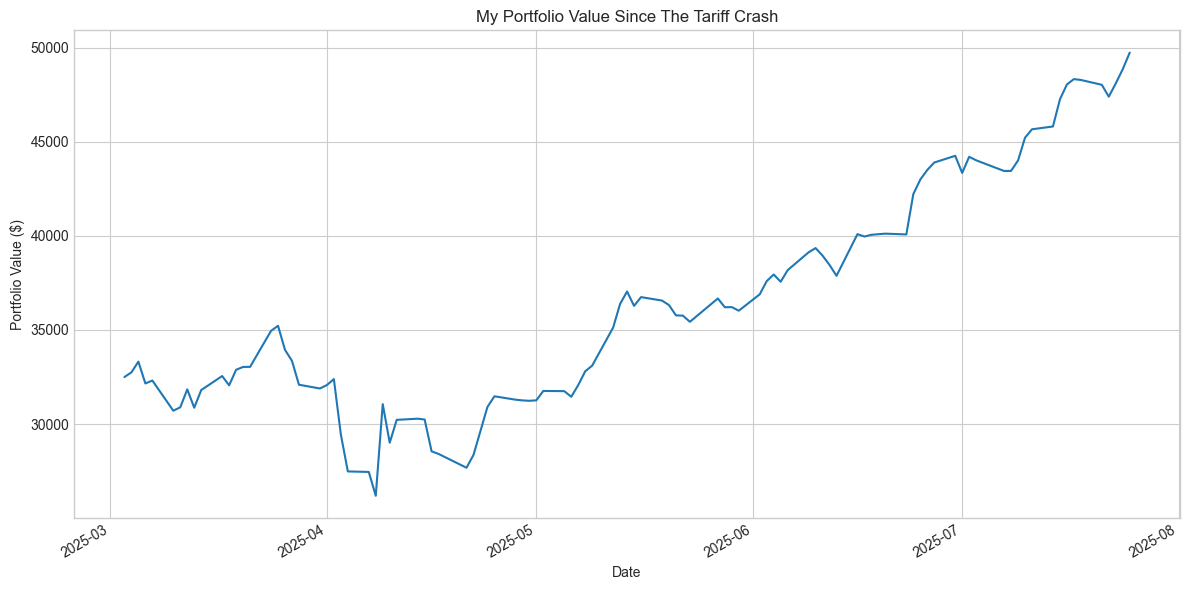

In [21]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')  

# Plot portfolio value
portfolio_value['Total'].plot(figsize=(12, 6), title='My Portfolio Value Since The Tariff Crash', grid=True)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


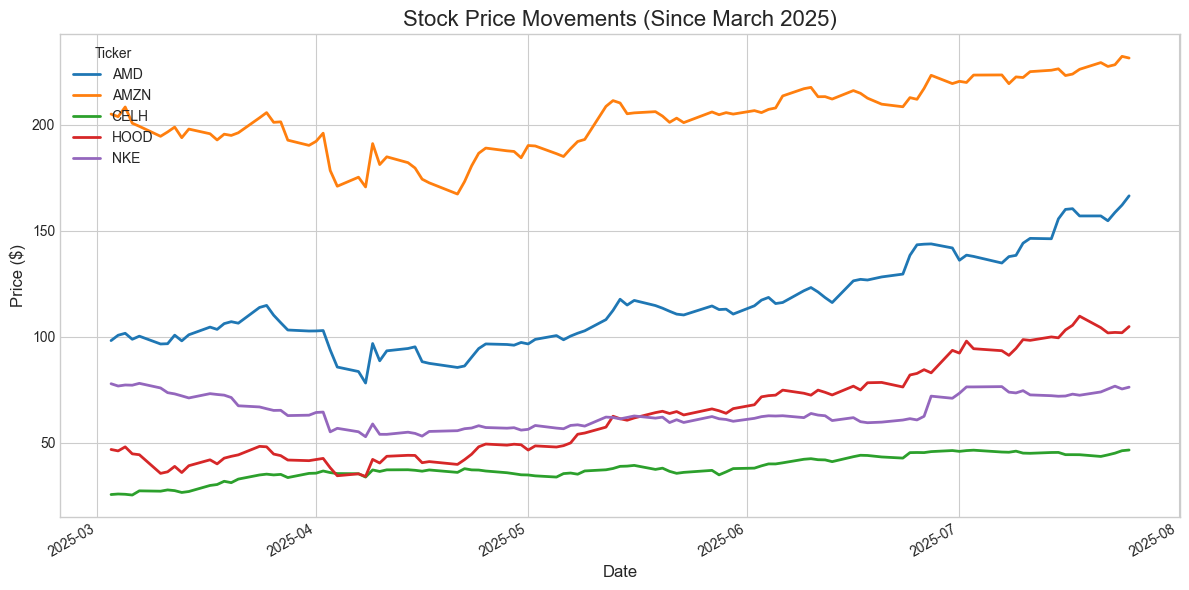

In [22]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')  

data.plot(figsize=(12, 6), linewidth=2)
plt.title("Stock Price Movements (Since March 2025)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.legend(title="Ticker", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [23]:
# Make sure index is datetime
portfolio_value.index = pd.to_datetime(portfolio_value.index)

# Resample every 2 weeks
portfolio_value_biweekly = portfolio_value.resample('2W').last()

# Highlight function for Total column
def highlight_total(s):
    return ['background-color: #ffeb3b; font-weight: bold' if col == 'Total' else '' for col in s.index]

# Style the biweekly portfolio table
styled_table = (
    portfolio_value_biweekly.style
        .format("${:,.0f}")
        .apply(highlight_total, axis=1)
        .background_gradient(cmap="Greens", axis=1)
        .set_caption("💼 Portfolio Value by Position (Biweekly)")
        .set_properties(**{
            'border': '1px solid black',
            'padding': '4px',
            'font-size': '13px'
        })
)

styled_table






,AMD,AMZN,HOOD,NKE,CELH,Total
Date,,,,,,
2025-03-09 00:00:00,"$15,404","$11,594","$3,695","$1,067",$549,"$32,310"
2025-03-23 00:00:00,"$16,345","$11,417","$3,690",$923,$660,"$33,036"
2025-04-06 00:00:00,"$13,169","$9,950","$2,871",$777,$713,"$27,481"
2025-04-20 00:00:00,"$13,436","$10,044","$3,426",$757,$747,"$28,410"
2025-05-04 00:00:00,"$15,172","$11,055","$4,042",$796,$691,"$31,755"
2025-05-18 00:00:00,"$17,993","$11,963","$5,138",$857,$790,"$36,741"
2025-06-01 00:00:00,"$17,004","$11,930","$5,503",$823,$759,"$36,019"
2025-06-15 00:00:00,"$17,838","$12,342","$6,040",$827,$825,"$37,872"
2025-06-29 00:00:00,"$22,083","$12,994","$6,907",$985,$920,"$43,889"


In [26]:
import numpy as np

# Calculate biweekly returns from Total column
returns = portfolio_value_biweekly['Total'].pct_change().dropna()

# Set risk-free rate (annualized, converted to biweekly)
risk_free_rate = 0.03 / 26  # 3% per year, 26 biweekly periods

excess_returns = returns - risk_free_rate

sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: 0.52


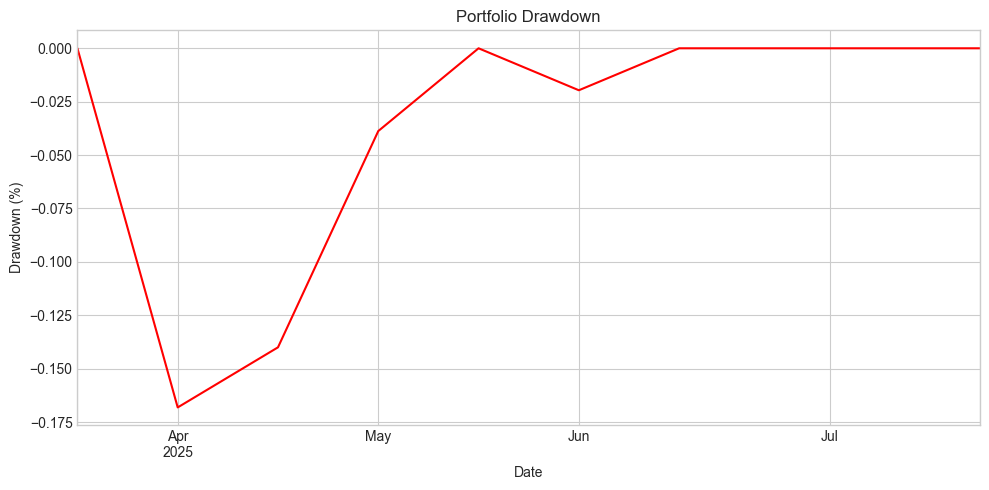

In [28]:
cumulative_returns = (1 + returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max

plt.figure(figsize=(10, 5))
drawdown.plot(title="Portfolio Drawdown", color='red')
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("drawdown.png", dpi=300)
plt.show()


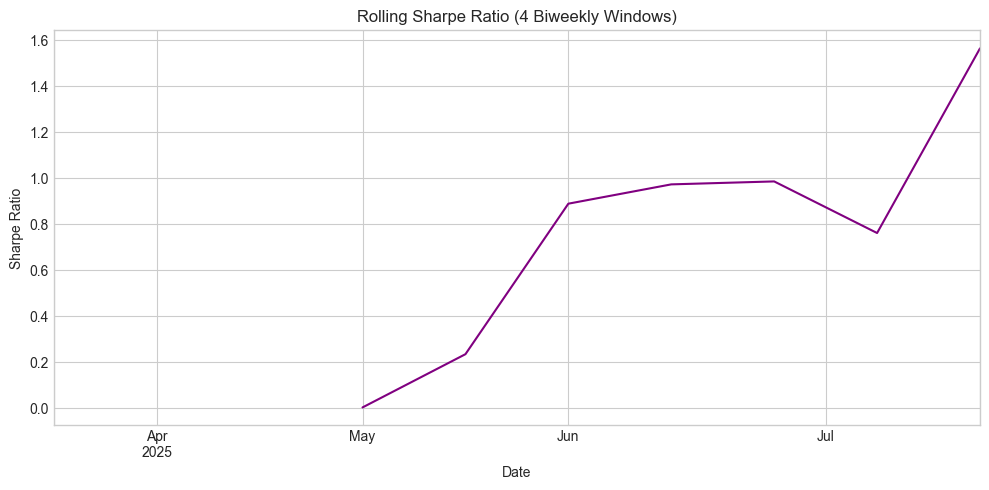

In [29]:
rolling_sharpe = excess_returns.rolling(window=4).mean() / excess_returns.rolling(window=4).std()

plt.figure(figsize=(10, 5))
rolling_sharpe.plot(title="Rolling Sharpe Ratio (4 Biweekly Windows)", color='purple')
plt.ylabel("Sharpe Ratio")
plt.grid(True)
plt.tight_layout()
plt.savefig("rolling_sharpe.png", dpi=300)
plt.show()


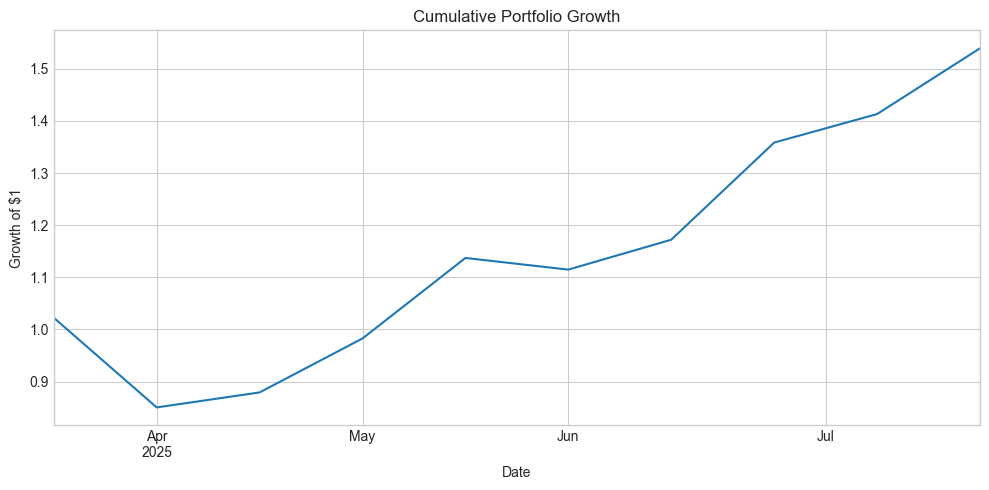

In [30]:
cumulative_returns = (1 + returns).cumprod()

plt.figure(figsize=(10, 5))
cumulative_returns.plot(title="Cumulative Portfolio Growth", legend=False)
plt.ylabel("Growth of $1")
plt.grid(True)
plt.tight_layout()
plt.savefig("cumulative_growth.png", dpi=300)
plt.show()
